In [1]:
#libraries to be used
from Negara import Negara
import pandas as pd
import numpy as np
import plotly.express as px
from geopy.geocoders import Nominatim

In [2]:
# put the file name here becuz the file name is long
path = 'EKSPORT & IMPORT MENGIKUT NEGARA (RM JUTA) 2016-2023.csv' 

In [3]:
# Create an instance of the Negara class
negara_data = Negara(path)

In [4]:
# Load and clean the data
negara_data.load_and_clean_data()

In [5]:
# Extract and group the export and import data
negara_data.extract_and_group_data()

# Access the grouped data
exports_grouped = negara_data.get_exports_grouped()
imports_grouped = negara_data.get_imports_grouped()

exports_grouped

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
AFGHANISTAN,354,518,431,455,497,894,1574,1535
AFRICA,19082,20904,19029,19128,19664,30405,40464,31957
ALANDISLANDS,0,0,0,0,0,0,0,0
ALBANIA,45,18,42,21,20,15,14,79
ALGERIA,513,509,499,568,368,483,536,432
...,...,...,...,...,...,...,...,...
YEMEN,592,798,759,670,831,809,666,1111
YUGOSLAVIAFEDREPOF,0,0,0,0,0,0,0,0
ZAIREREPUBLICOF,0,0,0,0,0,0,0,0


In [6]:
exports_grouped = exports_grouped.astype(float)
results = negara_data.find_mx(exports_grouped)
results

,Max Value,Max Country
Year,,
2016,114442.0,SINGAPORE
2017,135628.0,SINGAPORE
2018,140249.0,SINGAPORE
2019,140931.0,CHINA
2020,159223.0,CHINA
2021,192475.0,CHINA
2022,232484.0,SINGAPORE
2023,219295.0,SINGAPORE


In [7]:
exports_grouped = exports_grouped.astype(float)
results = negara_data.find_mn(exports_grouped)
results

,Min Value,Min Country
Year,,
2016,0.0,"ALANDISLANDS, ANGUILLA, BONAIRESINTEUSTATIUSAN..."
2017,0.0,"ALANDISLANDS, ANGUILLA, BONAIRESINTEUSTATIUSAN..."
2018,0.0,"ALANDISLANDS, ANGUILLA, BONAIRESINTEUSTATIUSAN..."
2019,0.0,"ALANDISLANDS, ANGUILLA, ARUBA, BONAIRESINTEUST..."
2020,0.0,"ALANDISLANDS, ANGUILLA, ARUBA, BONAIRESINTEUST..."
2021,0.0,"ALANDISLANDS, ANGUILLA, ARUBA, BONAIRESINTEUST..."
2022,0.0,"ALANDISLANDS, ANGUILLA, BONAIRESINTEUSTATIUSAN..."
2023,0.0,"ALANDISLANDS, ANDORRA, ANGUILLA, BONAIRESINTEU..."


In [8]:
# Extract the list of 'Min Country' values
if results is not None:
    min_country_list = results['Min Country'].tolist()

    # Create a temporary list to clean up repetitions
    temp_list = []
    for countries in min_country_list:
        # Split the string of countries into a list of individual countries
        country_list = countries.split(', ')
        # Add these countries to the temporary list if they are not already present
        for country in country_list:
            if country not in temp_list:
                temp_list.append(country)

    # Define the number of columns and calculate the chunk size
    num_columns = 3

    # Calculate the number of rows needed
    num_rows = len(temp_list) // num_columns + (len(temp_list) % num_columns > 0)

    # Fill the DataFrame with the countries, ensuring every row has exactly 'num_columns' columns
    data = [temp_list[i * num_columns:(i + 1) * num_columns] for i in range(num_rows)]

    # Create the DataFrame
    df = pd.DataFrame(data, columns=[f"Column {i+1}" for i in range(num_columns)])

df


,Column 1,Column 2,Column 3
0,ALANDISLANDS,ANGUILLA,BONAIRESINTEUSTATIUSANDSABA
1,BOUVETISLAND,BRITISHINDIANOCEANTERRITORY,BURUNDI
2,COCOS(KEELING)ISLANDS,FALKLANDISLAND(MALVINAS),FAROEISLANDS
3,FRENCHSOUTHERNTERRITORIES,GREENLAND,GUERNSEY
4,HEARDISLANDANDMCDONALDISLANDS,HOLYSEE(VATICANCITYSTATE),JERSEY
5,MONTSERRAT,NETHERLANDSANTILLES,NIUE
6,NORFOLKISLAND,PITCAIRN,SAINTBARTHELEMY
7,SAINTHELENAASCENSIONANDTRISTANDACUNHA,SAINTKITTSANDNEVIS,SAINTMARTIN(FRENCHPART)
8,SAINTPIERREANDMIQUELON,SANMARINO,SINTMAARTEEN(DUTCHPART)
9,SOUTHGEORGIAANDTHESOUTHSANDWICHISLANDS,SOUTHSUDAN,SVALBARDANDJANMAYEN


In [9]:
imports_grouped

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
AFGHANISTAN,1,2,4,0,0,0,2,17
AFRICA,6889,11536,12403,13808,11674,15799,19431,22241
ALANDISLANDS,0,0,0,0,0,0,0,0
ALBANIA,2,1,1,12,50,13,2,5
ALGERIA,4,9,358,298,726,880,1212,108
...,...,...,...,...,...,...,...,...
YEMEN,36,50,415,244,287,109,258,242
YUGOSLAVIAFEDREPOF,0,0,0,0,0,0,0,0
ZAIREREPUBLICOF,0,0,0,0,0,0,0,0


In [10]:
imports_grouped = imports_grouped.astype(float)
results = negara_data.find_mx(imports_grouped)
results

,Max Value,Max Country
Year,,
2016,142387.0,CHINA
2017,164445.0,CHINA
2018,175417.0,CHINA
2019,175667.0,CHINA
2020,172217.0,CHINA
2021,229016.0,CHINA
2022,275826.0,CHINA
2023,258127.0,CHINA


In [11]:
min_df = negara_data.find_mn(imports_grouped)
min_df

,Min Value,Min Country
Year,,
2016,0.0,"ALANDISLANDS, ANDORRA, ANGUILLA, ARUBA, BARBAD..."
2017,0.0,"ALANDISLANDS, AMERICANSAMOA, ANGUILLA, ANTIGUA..."
2018,0.0,"ALANDISLANDS, ANDORRA, ANGUILLA, ANTIGUA&BARBU..."
2019,0.0,"AFGHANISTAN, ALANDISLANDS, AMERICANSAMOA, ANDO..."
2020,0.0,"AFGHANISTAN, ALANDISLANDS, AMERICANSAMOA, ANDO..."
2021,0.0,"AFGHANISTAN, ALANDISLANDS, AMERICANSAMOA, ANGO..."
2022,0.0,"ALANDISLANDS, AMERICANSAMOA, ANDORRA, ANGUILLA..."
2023,0.0,"ALANDISLANDS, AMERICANSAMOA, ANDORRA, ANGUILLA..."


In [12]:
# Extract the list of 'Min Country' values
if min_df is not None:
    min_country_list = min_df['Min Country'].tolist()

    # Create a temporary list to clean up repetitions
    temp_list = []
    for countries in min_country_list:
        # Split the string of countries into a list of individual countries
        country_list = countries.split(', ')
        # Add these countries to the temporary list if they are not already present
        for country in country_list:
            if country not in temp_list:
                temp_list.append(country)

    # Define the number of columns and calculate the chunk size
    num_columns = 6

    # Calculate the number of rows needed
    num_rows = len(temp_list) // num_columns + (len(temp_list) % num_columns > 0)

    # Fill the DataFrame with the countries, ensuring every row has exactly 'num_columns' columns
    data = [temp_list[i * num_columns:(i + 1) * num_columns] for i in range(num_rows)]

    # Create the DataFrame
    df = pd.DataFrame(data, columns=[f"Column {i+1}" for i in range(num_columns)])

df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,ALANDISLANDS,ANDORRA,ANGUILLA,ARUBA,BARBADOS,BENIN
1,BERMUDA,BHUTAN,BONAIRESINTEUSTATIUSANDSABA,BOTSWANA,BOUVETISLAND,BRITISHINDIANOCEANTERRITORY
2,BURUNDI,CAPEVERDE,CAYMANISLANDS,CHAD,COCOS(KEELING)ISLANDS,COOKISLANDS
3,DOMINICA,EQUATORIALGUINEA,ERITREA,FALKLANDISLAND(MALVINAS),FAROEISLANDS,FRENCHGUIANA
4,FRENCHPOLYNESIA,FRENCHSOUTHERNTERRITORIES,GAMBIA,GIBRALTAR,GREENLAND,GRENADA
5,GUADELOUPE,GUAM,GUERNSEY,GUINEA-BISSAU,HAITI,HEARDISLANDANDMCDONALDISLANDS
6,HOLYSEE(VATICANCITYSTATE),JERSEY,KYRGYZSTAN,LESOTHO,MARTINIQUE,MAYOTTE
7,MICRONESIAFEDERATEDSTATESOF,MONACO,MONTSERRAT,NAURU,NETHERLANDSANTILLES,NIUE
8,NORFOLKISLAND,NORTHERNMARIANAISLANDS,PALAU,PITCAIRN,SAINTBARTHELEMY,SAINTHELENAASCENSIONANDTRISTANDACUNHA
9,SAINTKITTSANDNEVIS,SAINTLUCIA,SAINTMARTIN(FRENCHPART),SAINTPIERREANDMIQUELON,SAINTVINCENTANDTHEGRENADINES,SANMARINO


In [13]:
# Assuming countries are in the index
all_countries_set = set(exports_grouped.index)

# Combine all lists into one set
combined_set = set(negara_data.AFTA + negara_data.EUA + negara_data.EFTA + 
                    negara_data.LAIA + negara_data.NAFTA + negara_data.SAARC)

# Find countries not in any of the combined sets
not_in_any_set = list(all_countries_set - combined_set)

print(not_in_any_set)

['BOTSWANA', 'ANDORRA', 'CONGO', 'ZAMBIA', 'WALLISANDFUTUNA', 'OMAN', 'YUGOSLAVIAFEDREPOF', 'SAINTLUCIA', 'BOUVETISLAND', 'KIRIBATI', 'FALKLANDISLAND(MALVINAS)', 'LEBANON', 'GRENADA', 'GABON', 'KAZAKHSTAN', 'GREENLAND', 'SEYCHELLES', 'SAINTHELENAASCENSIONANDTRISTANDACUNHA', 'ELSALVADOR', 'VIRGINISLANDSBRITISH', 'YEMEN', 'FAROEISLANDS', 'BAHRAIN', 'GEORGIA', 'MADAGASCAR', 'NEWZEALAND', 'NIUE', 'ALGERIA', 'SOLOMONISLANDS', 'MONTSERRAT', 'SIERRALEONE', 'GUATEMALA', 'COCOS(KEELING)ISLANDS', 'SOUTHSUDAN', 'ANGOLA', 'SOMALIA', 'TURKSANDCAICOSISLANDS', 'OTHERCTICAMOATUNAISLAND', 'SERBIA', 'MALI', 'GUAM', 'IRAQ', 'BRUNEIDARUSSALAM', 'QATAR', 'UNITEDARABEMIRATES', 'MOROCCO', 'UZBEKISTAN', 'CHRISTMASISLAND', 'TAJIKISTAN', 'KENYA', 'BURKINAFASO', 'AMERICANSAMOA', 'AFRICA', 'ARMENIA', 'COSTARICA', 'UKRAINE', 'MAYOTTE', 'TURKMENISTAN', 'TONGA', 'SAINTBARTHELEMY', 'BARBADOS', 'ANTIGUA&BARBUDA', 'BOLIVIAPLURINATIONALSTATEOF', 'SAINTPIERREANDMIQUELON', 'TUNISIA', 'IRANISLAMICREPUBLICOF', 'TAIWANPROVIN

In [14]:
countries = [
    ['TAIWANPROVINCEOFCHINA', 'EQUATORIALGUINEA', 'SOUTHAMERICA', 'CAYMANISLANDS', 'ALBANIA'],
    ['SAINTLUCIA', 'UNITEDARABEMIRATES', 'REUNION', 'IRANISLAMICREPUBLICOF', 'JORDAN'],
    ['MAYOTTE', 'GABON', 'UNITEDSTATES', 'NAURU', 'COMOROS'],
    ['ELSALVADOR', 'DOMINICANREPUBLIC', 'BOSNIAANDHERZEGOVINA', 'NIUE', 'GUERNSEY'],
    ['GRENADA', 'AUSTRALIA', 'TOKELAU', 'TONGA', 'SOLOMONISLANDS'],
    ['BOTSWANA', 'FRENCHPOLYNESIA', 'VANUATU', 'JAPAN', 'SUDAN'],
    ['MICRONESIAFEDERATEDSTATESOF', 'VENEZUELABOLIVARIANREPUBLICOF', 'HOLYSEE(VATICANCITYSTATE)', 'MAURITANIA', 'CAMEROON'],
    ['TANZANIAUNITEDREPUBLICOF', 'SAINTPIERREANDMIQUELON', 'ANGUILLA', 'CHRISTMASISLAND', 'KENYA'],
    ['MOZAMBIQUE', 'ARUBA', 'SOUTHAFRICA', 'YUGOSLAVIAFEDREPOF', 'CONGO'],
    ['HONGKONG', 'TURKIYE', 'LIBYA', 'PANAMA', 'PUERTORICO'],
    ['ALANDISLANDS', 'MONACO', 'SENEGAL', 'GUAM', 'MACAO'],
    ['IRAQ', 'PITCAIRN', 'SINTMAARTEEN(DUTCHPART)', 'SOMALIA', 'BARBADOS'],
    ['SAINTBARTHELEMY', 'RUSSIANFEDERATION', 'TUVALU', 'FRENCHSOUTHERNTERRITORIES', 'MOROCCO'],
    ["COTED'IVOIRE", 'BOLIVIAPLURINATIONALSTATEOF', 'QATAR', 'GUYANA', 'SVALBARDANDJANMAYEN'],
    ['TUNISIA', 'VIETNAM', 'ANGOLA', 'MADAGASCAR', 'JERSEY'],
    ['NETHERLANDSANTILLES', 'UNITEDKINGDOM', 'UNITEDSTATEMINOROUTLYINGISLANDS', 'CZECHREPUBLIC', "LAOPEOPLE'SDEMOCRATICREPUBLIC"],
    ['CAPEVERDE', 'NEWZEALAND', 'BRUNEIDARUSSALAM', 'MARTINIQUE', 'AFRICA'],
    ['MONGOLIA', 'CHINA', 'ZAIREREPUBLICOF', 'SANMARINO', 'SOUTHSUDAN'],
    ['LIBERIA', 'GHANA', 'GIBRALTAR', 'GREENLAND', 'MONTSERRAT'],
    ['TIMORLESTE', 'WESTERNSAHARA', 'OMAN', 'BURKINAFASO', 'KUWAIT'],
    ['TURKSANDCAICOSISLANDS', 'BERMUDA', 'GUINEA-BISSAU', 'KIRIBATI', 'ZIMBABWE'],
    ['TURKMENISTAN', 'DJIBOUTI', 'EGYPT', 'SRILANKA', 'ALGERIA'],
    ['SURINAME', 'COCOS(KEELING)ISLANDS', 'OTHERCTICAMOATUNAISLAND', 'SAOTOMEANDPRINCIPE', 'ANDORRA'],
    ['PALAU', 'SYRIANARABREPUBLIC', 'ARMENIA', 'ANTIGUA&BARBUDA', 'UZBEKISTAN'],
    ['MONTENEGRO', 'CENTRALAFRICANREPUBLIC', 'ZAMBIA', 'AMERICANSAMOA', 'MALAWI'],
    ['TAJIKISTAN', 'CURACAO', 'BAHRAIN', 'TOGO', 'GUADELOUPE'],
    ['COOKISLANDS', 'VIRGINISLANDSU.S', 'HONDURAS', 'TRINIDADANDTOBAGO', 'FALKLANDISLAND(MALVINAS)'],
    ['SIERRALEONE', 'WESTERNSAMOA', 'MAURITIUS', 'GAMBIA', 'GUINEA'],
    ['BOUVETISLAND', 'PAPUANEWGUINEA', 'BURUNDI', 'SAUDIARABIA', 'WALLISANDFUTUNA'],
    ['KYRGYZSTAN', 'RWANDA', 'FIJI', 'LESOTHO', 'ESWATINI'],
    ['NORTHERNMARIANAISLANDS', 'DOMINICA', 'BELARUS', 'GUATEMALA', 'GEORGIA'],
    ['YEMEN', 'BONAIRESINTEUSTATIUSANDSABA', 'FAROEISLANDS', 'SAINTVINCENTANDTHEGRENADINES', 'JAMAICA'],
    ['NIGERIA', 'BENIN', 'COSTARICA', 'BAHAMAS', 'ETHIOPIA'],
    ['FRENCHGUIANA', 'MARSHALLISLANDS', 'LEBANON', 'SEYCHELLES', 'ERITREA'],
    ['NIGER', 'PALESTINIANTERRITORYOCCUPIED', 'SERBIA', 'HAITI', 'SAINTHELENAASCENSIONANDTRISTANDACUNHA'],
    ['MOLDOVAREPUBLICOF', 'NEWCALEDONIA', 'NAMIBIA', 'NORFOLKISLAND', 'VIRGINISLANDSBRITISH'],
    ['KAZAKHSTAN', 'NICARAGUA', 'MACEDONIATHEFORMERYUGOSLAVREPUBLICOF', 'BELIZE', 'BRITISHINDIANOCEANTERRITORY'],
    ['HEARDISLANDANDMCDONALDISLANDS', 'AZERBAIJAN', 'SAINTKITTSANDNEVIS', 'CHAD', 'MALI'],
    ['UGANDA', 'CONGOTHEDEMOCRATICREPUBLICOFTHE', 'UKRAINE', 'SOUTHGEORGIAANDTHESOUTHSANDWICHISLANDS', 'KOREAREPUBLICOF'],
    ['SAINTMARTIN(FRENCHPART)', '', '', '', '']
]

# Creating a DataFrame from the list
df = pd.DataFrame(countries, columns=['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5'])

df

,Column 1,Column 2,Column 3,Column 4,Column 5
0,TAIWANPROVINCEOFCHINA,EQUATORIALGUINEA,SOUTHAMERICA,CAYMANISLANDS,ALBANIA
1,SAINTLUCIA,UNITEDARABEMIRATES,REUNION,IRANISLAMICREPUBLICOF,JORDAN
2,MAYOTTE,GABON,UNITEDSTATES,NAURU,COMOROS
3,ELSALVADOR,DOMINICANREPUBLIC,BOSNIAANDHERZEGOVINA,NIUE,GUERNSEY
4,GRENADA,AUSTRALIA,TOKELAU,TONGA,SOLOMONISLANDS
5,BOTSWANA,FRENCHPOLYNESIA,VANUATU,JAPAN,SUDAN
6,MICRONESIAFEDERATEDSTATESOF,VENEZUELABOLIVARIANREPUBLICOF,HOLYSEE(VATICANCITYSTATE),MAURITANIA,CAMEROON
7,TANZANIAUNITEDREPUBLICOF,SAINTPIERREANDMIQUELON,ANGUILLA,CHRISTMASISLAND,KENYA
8,MOZAMBIQUE,ARUBA,SOUTHAFRICA,YUGOSLAVIAFEDREPOF,CONGO
9,HONGKONG,TURKIYE,LIBYA,PANAMA,PUERTORICO


In [15]:
other_import = negara_data.createImportGrouped(not_in_any_set)
other_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
AFRICA,6889,11536,12403,13808,11674,15799,19431,22241
ALANDISLANDS,0,0,0,0,0,0,0,0
ALBANIA,2,1,1,12,50,13,2,5
ALGERIA,4,9,358,298,726,880,1212,108
AMERICANSAMOA,1,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
YEMEN,36,50,415,244,287,109,258,242
YUGOSLAVIAFEDREPOF,0,0,0,0,0,0,0,0
ZAIREREPUBLICOF,0,0,0,0,0,0,0,0


In [16]:
other_export = negara_data.createExportGrouped(not_in_any_set)
other_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
AFRICA,19082,20904,19029,19128,19664,30405,40464,31957
ALANDISLANDS,0,0,0,0,0,0,0,0
ALBANIA,45,18,42,21,20,15,14,79
ALGERIA,513,509,499,568,368,483,536,432
AMERICANSAMOA,56,18,42,63,16,77,275,91
...,...,...,...,...,...,...,...,...
YEMEN,592,798,759,670,831,809,666,1111
YUGOSLAVIAFEDREPOF,0,0,0,0,0,0,0,0
ZAIREREPUBLICOF,0,0,0,0,0,0,0,0


In [17]:
other_net_df = negara_data.calNet(other_export, other_import)
other_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
AFRICA,12193.0,9368.0,6626.0,5320.0,7990.0,14606.0,21033.0,9716.0
ALANDISLANDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALBANIA,43.0,17.0,41.0,9.0,-30.0,2.0,12.0,74.0
ALGERIA,509.0,500.0,141.0,270.0,-358.0,-397.0,-676.0,324.0
AMERICANSAMOA,55.0,18.0,40.0,63.0,16.0,77.0,275.0,91.0
...,...,...,...,...,...,...,...,...
YEMEN,556.0,748.0,344.0,426.0,544.0,700.0,408.0,869.0
YUGOSLAVIAFEDREPOF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAIREREPUBLICOF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def calculate_max_min_values(other_net_df):
    exclude_countries = ['CHINA', 'HONGKONG', 'TAIWANPROVINCEOFCHINA','UNITEDSTATES']
    
    max_values = {}
    min_values = {}

    for year in other_net_df.columns:
        filtered_df = other_net_df[~other_net_df.index.isin(exclude_countries)]  # Exclude specified countries
        
        max_value = filtered_df[year].max()
        min_value = filtered_df[year].min()
        
        max_country = filtered_df[filtered_df[year] == max_value].index.tolist()
        min_country = filtered_df[filtered_df[year] == min_value].index.tolist()
        
        max_values[f"{year}"] = {'Max Value': max_value, 'Max Country': max_country}
        min_values[f"{year}"] = {'Min Value': min_value, 'Min Country': min_country}
    
    return max_values, min_values

# Assuming other_net_df is already defined
max_values, min_values = calculate_max_min_values(other_net_df)

# Print the results in table format
print("Max Values:")
for year, values in max_values.items():
    print(f"{year}: Max Value = {values['Max Value']}, Max Country = {values['Max Country']}")

print("\nMin Values:")
for year, values in min_values.items():
    print(f"{year}: Min Value = {values['Min Value']}, Min Country = {values['Min Country']}")


Max Values:
2016_Net: Max Value = 12193.0, Max Country = ['AFRICA']
2017_Net: Max Value = 12285.0, Max Country = ['AUSTRALIA']
2018_Net: Max Value = 14872.0, Max Country = ['VIETNAM']
2019_Net: Max Value = 15798.0, Max Country = ['VIETNAM']
2020_Net: Max Value = 12893.0, Max Country = ['VIETNAM']
2021_Net: Max Value = 21856.0, Max Country = ['VIETNAM']
2022_Net: Max Value = 21876.0, Max Country = ['VIETNAM']
2023_Net: Max Value = 24600.0, Max Country = ['VIETNAM']

Min Values:
2016_Net: Min Value = -13770.0, Min Country = ['KOREAREPUBLICOF']
2017_Net: Min Value = -10533.0, Min Country = ['KOREAREPUBLICOF']
2018_Net: Min Value = -14130.0, Min Country = ['SAUDIARABIA']
2019_Net: Min Value = -15306.0, Min Country = ['SAUDIARABIA']
2020_Net: Min Value = -12019.0, Min Country = ['SAUDIARABIA']
2021_Net: Min Value = -11860.0, Min Country = ['KOREAREPUBLICOF']
2022_Net: Min Value = -30995.0, Min Country = ['SAUDIARABIA']
2023_Net: Min Value = -36800.0, Min Country = ['SAUDIARABIA']


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

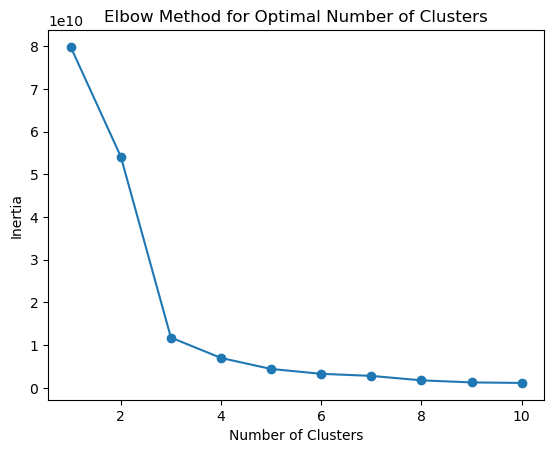

In [19]:
negara_data.plot_elbow_method(other_net_df)

In [20]:
other_cluster = negara_data.perform_clustering(other_net_df,4)
other_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,251.957895,271.747368,280.278947,188.452632,145.515789,438.463158,541.515789,470.036842
1,24773.500000,28553.500000,42777.000000,40212.000000,46673.000000,63293.000000,72428.500000,73504.000000
2,-32190.000000,-34640.500000,-33516.000000,-27375.000000,-18576.500000,-35559.500000,-59765.000000,-53330.000000
3,-7278.000000,-6454.000000,-14130.000000,-15306.000000,-12019.000000,-7441.000000,-30995.000000,-36800.000000


In [21]:
# 256 country can be split into different area
# 1.  ASEAN Free Trade Area(AFTA)
# 2. Europe Area(EUA)
# 3. European Free Trade Association(EFTA)
# 4, Latin American Integration Association(LAIA)
# 5. North American Free Trade Agreement (NAFTA)
# 6. South Asian Association for Regional Cooperation (SAARC)

# Make the area and its country in a list 

In [22]:
AfTA_import = negara_data.createImportGrouped(negara_data.AFTA)
AfTA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
CAMBODIA,584,709,706,685,478,454,693,675
INDONESIA,29486,37879,40490,38898,36694,56127,73968,60301
MYANMAR,824,967,1233,1089,937,1169,1411,1056
PHILIPPINES,6596,8976,9199,9030,8780,9924,13033,9672
SINGAPORE,72398,92729,103071,89496,73678,93633,135040,143726
THAILAND,42328,48141,48624,44277,34300,45383,56186,54457


In [23]:
AfTA_export = negara_data.createExportGrouped(negara_data.AFTA)
AfTA_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
CAMBODIA,1182,1247,1549,2595,1495,1894,2311,2348
INDONESIA,27945,33631,31907,31328,29589,39180,55736,50910
MYANMAR,3925,4134,2810,2831,3067,2711,5967,4003
PHILIPPINES,13638,16521,16955,18607,17607,22629,28235,26445
SINGAPORE,114442,135628,140249,137078,142146,173974,232484,219295
THAILAND,44092,50508,57061,56318,45339,52162,65774,58913


In [24]:
AFTA_net_df = negara_data.calNet(AfTA_export, AfTA_import)
AFTA_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
CAMBODIA,598.0,538.0,843.0,1910.0,1017.0,1440.0,1618.0,1673.0
INDONESIA,-1541.0,-4248.0,-8583.0,-7570.0,-7105.0,-16947.0,-18232.0,-9391.0
MYANMAR,3101.0,3167.0,1577.0,1742.0,2130.0,1542.0,4556.0,2947.0
PHILIPPINES,7042.0,7545.0,7756.0,9577.0,8827.0,12705.0,15202.0,16773.0
SINGAPORE,42044.0,42899.0,37178.0,47582.0,68468.0,80341.0,97444.0,75569.0
THAILAND,1764.0,2367.0,8437.0,12041.0,11039.0,6779.0,9588.0,4456.0


In [25]:
results = negara_data.find_max_min(AFTA_net_df)

# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value  Max Country
2016_Net    42044.0  [SINGAPORE]
2017_Net    42899.0  [SINGAPORE]
2018_Net    37178.0  [SINGAPORE]
2019_Net    47582.0  [SINGAPORE]
2020_Net    68468.0  [SINGAPORE]
2021_Net    80341.0  [SINGAPORE]
2022_Net    97444.0  [SINGAPORE]
2023_Net    75569.0  [SINGAPORE]

Min Values:
          Min Value  Min Country
2016_Net    -1541.0  [INDONESIA]
2017_Net    -4248.0  [INDONESIA]
2018_Net    -8583.0  [INDONESIA]
2019_Net    -7570.0  [INDONESIA]
2020_Net    -7105.0  [INDONESIA]
2021_Net   -16947.0  [INDONESIA]
2022_Net   -18232.0  [INDONESIA]
2023_Net    -9391.0  [INDONESIA]


In [26]:
# Define the title and savefig_name
title = 'AFTA Net Exports Line Plot'
savefig_name = 'afta_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(AFTA_net_df, title, savefig_name)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

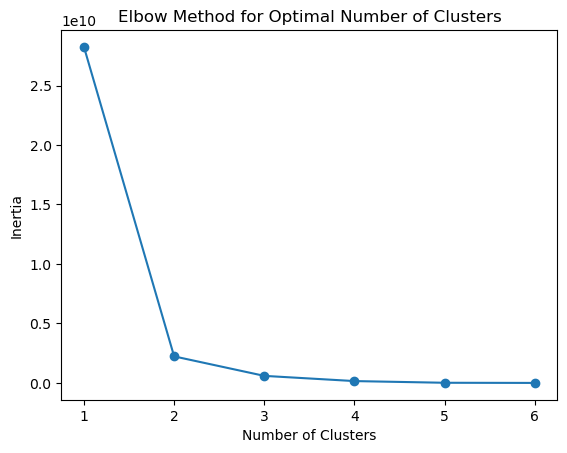

In [27]:
negara_data.plot_elbow_method(AFTA_net_df)

In [28]:
AFTA_cluster = negara_data.perform_clustering(AFTA_net_df,3)
AFTA_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,3126.25,3404.25,4653.25,6317.5,5753.25,5616.5,7741.0,6462.25
1,42044.00,42899.00,37178.00,47582.0,68468.00,80341.0,97444.0,75569.00
2,-1541.00,-4248.00,-8583.00,-7570.0,-7105.00,-16947.0,-18232.0,-9391.00


In [29]:
EUA_import = negara_data.createImportGrouped(negara_data.EUA)
EUA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
AUSTRIA,2200,2336,2829,2277,1956,2748,2781,2982
BELGIUM,2617,2704,2919,3345,2903,4250,3791,3727
BULGARIA,134,126,148,135,110,123,171,174
CROATIA,92,35,15,27,30,39,107,294
CYPRUS,54,40,30,26,44,33,32,48
DENMARK,788,842,938,996,1058,1202,1396,1480
ESTONIA,24,34,36,104,64,66,81,74
FINLAND,638,746,804,762,1042,849,1220,1239
FRANCE,9486,12728,16626,10860,6260,6949,9663,10596


In [30]:
EUA_import = negara_data.createImportGrouped(negara_data.EUA)
EUA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
AUSTRIA,2200,2336,2829,2277,1956,2748,2781,2982
BELGIUM,2617,2704,2919,3345,2903,4250,3791,3727
BULGARIA,134,126,148,135,110,123,171,174
CROATIA,92,35,15,27,30,39,107,294
CYPRUS,54,40,30,26,44,33,32,48
DENMARK,788,842,938,996,1058,1202,1396,1480
ESTONIA,24,34,36,104,64,66,81,74
FINLAND,638,746,804,762,1042,849,1220,1239
FRANCE,9486,12728,16626,10860,6260,6949,9663,10596


In [31]:
EUA_export = negara_data.createExportGrouped(negara_data.EUA)
EUA_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
AUSTRIA,461,449,506,454,514,537,860,1076
BELGIUM,4194,4863,4646,4521,4514,6405,8998,9342
BULGARIA,266,342,406,417,475,457,460,478
CROATIA,67,75,212,86,76,121,190,170
CYPRUS,53,72,62,59,46,59,41,37
DENMARK,559,629,743,825,882,1218,1116,886
ESTONIA,130,179,273,299,324,273,299,382
FINLAND,423,532,591,622,690,1068,1015,1147
FRANCE,5746,5830,6293,6214,5141,5156,8683,6119


In [32]:
EUA_net_df = negara_data.calNet(EUA_export, EUA_import)
EUA_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
AUSTRIA,-1739.0,-1887.0,-2323.0,-1823.0,-1442.0,-2211.0,-1921.0,-1906.0
BELGIUM,1577.0,2159.0,1727.0,1176.0,1611.0,2155.0,5207.0,5615.0
BULGARIA,132.0,216.0,258.0,282.0,365.0,334.0,289.0,304.0
CROATIA,-25.0,40.0,197.0,59.0,46.0,82.0,83.0,-124.0
CYPRUS,-1.0,32.0,32.0,33.0,2.0,26.0,9.0,-11.0
DENMARK,-229.0,-213.0,-195.0,-171.0,-176.0,16.0,-280.0,-594.0
ESTONIA,106.0,145.0,237.0,195.0,260.0,207.0,218.0,308.0
FINLAND,-215.0,-214.0,-213.0,-140.0,-352.0,219.0,-205.0,-92.0
FRANCE,-3740.0,-6898.0,-10333.0,-4646.0,-1119.0,-1793.0,-980.0,-4477.0


In [33]:
results = negara_data.find_max_min(EUA_net_df)
# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value    Max Country
2016_Net    14901.0  [NETHERLANDS]
2017_Net    19048.0  [NETHERLANDS]
2018_Net    19027.0  [NETHERLANDS]
2019_Net    20606.0  [NETHERLANDS]
2020_Net    19123.0  [NETHERLANDS]
2021_Net    26336.0  [NETHERLANDS]
2022_Net    35989.0  [NETHERLANDS]
2023_Net    30754.0  [NETHERLANDS]

Min Values:
          Min Value Min Country
2016_Net    -3740.0    [FRANCE]
2017_Net    -6898.0    [FRANCE]
2018_Net   -10333.0    [FRANCE]
2019_Net    -4646.0    [FRANCE]
2020_Net    -1442.0   [AUSTRIA]
2021_Net   -11509.0   [IRELAND]
2022_Net   -12144.0   [IRELAND]
2023_Net   -14463.0   [IRELAND]


In [34]:
for i in range(1, 6):
    # Define the title and savefig_name
    title = f'EUA Net Exports Line Plot - {i}'
    savefig_name = f'eua{i}_net_exports_line.png'
    
    # Access the data using a method or attribute
    eua_data = getattr(negara_data, f'EUA{i}', None)
    if eua_data is not None:
        # Define the DataFrame dynamically
        EUA_df = EUA_net_df.loc[EUA_net_df.index.intersection(eua_data)]
    
        # Plot the DataFrame and save the image
        negara_data.plot_net_exports_line(EUA_df, title, savefig_name)
    else:
        print(f"Data for EUA{i} not found.")


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

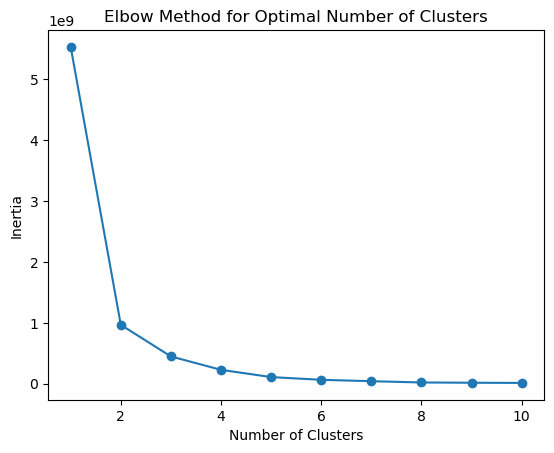

In [35]:
negara_data.plot_elbow_method(EUA_net_df)

In [36]:
EUA_cluster = negara_data.perform_clustering(EUA_net_df,3)
EUA_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,-212.75,-161.041667,-180.125,-102.875,258.833333,424.25,400.541667,46.291667
1,14901.00,19048.000000,19027.000,20606.000,19123.000000,26336.00,35989.000000,30754.000000
2,-1864.00,-2913.000000,-3450.000,-2809.000,-1249.000000,-11509.00,-12144.000000,-14463.000000


In [37]:
EFTA_import = negara_data.createImportGrouped(negara_data.EFTA)
EFTA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
ICELAND,6,7,1,1,2,6,4,3
LIECHTENSTEIN,4,1,0,6,12,19,25,52
NORWAY,1054,1966,936,990,841,752,1058,1051
SWITZERLAND,7128,11853,10632,6507,6092,7706,7929,7163


In [38]:
EFTA_export = negara_data.createExportGrouped(negara_data.EFTA)
EFTA_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
ICELAND,5,4,15,4,6,231,628,103
LIECHTENSTEIN,3,3,2,3,3,3,5,3
NORWAY,374,425,354,450,546,789,807,711
SWITZERLAND,2802,5221,3126,2144,2694,1955,2696,3629


In [39]:
EFTA_net_df = negara_data.calNet(EFTA_export, EFTA_import)
EFTA_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
ICELAND,-1.0,-3.0,14.0,3.0,4.0,225.0,624.0,100.0
LIECHTENSTEIN,-1.0,2.0,2.0,-3.0,-9.0,-16.0,-20.0,-49.0
NORWAY,-680.0,-1541.0,-582.0,-540.0,-295.0,37.0,-251.0,-340.0
SWITZERLAND,-4326.0,-6632.0,-7506.0,-4363.0,-3398.0,-5751.0,-5233.0,-3534.0


In [40]:
# Define the title and savefig_name
title = 'EFTA Net Exports Line Plot'
savefig_name = 'efta_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(EFTA_net_df, title, savefig_name)

In [41]:
results = negara_data.find_max_min(EFTA_net_df)
# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value               Max Country
2016_Net       -1.0  [ICELAND, LIECHTENSTEIN]
2017_Net        2.0           [LIECHTENSTEIN]
2018_Net       14.0                 [ICELAND]
2019_Net        3.0                 [ICELAND]
2020_Net        4.0                 [ICELAND]
2021_Net      225.0                 [ICELAND]
2022_Net      624.0                 [ICELAND]
2023_Net      100.0                 [ICELAND]

Min Values:
          Min Value    Min Country
2016_Net    -4326.0  [SWITZERLAND]
2017_Net    -6632.0  [SWITZERLAND]
2018_Net    -7506.0  [SWITZERLAND]
2019_Net    -4363.0  [SWITZERLAND]
2020_Net    -3398.0  [SWITZERLAND]
2021_Net    -5751.0  [SWITZERLAND]
2022_Net    -5233.0  [SWITZERLAND]
2023_Net    -3534.0  [SWITZERLAND]


In [42]:
# Define the title and savefig_name
title = 'EFTA Net Exports Line Plot'
savefig_name = 'efta_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(EFTA_net_df, title, savefig_name)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

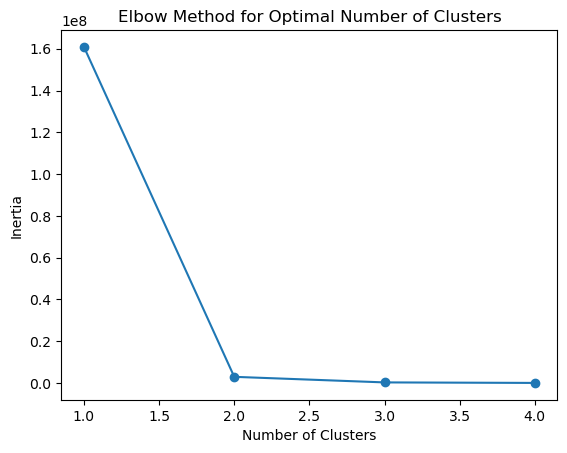

In [43]:
negara_data.plot_elbow_method(EFTA_net_df)

In [44]:
EFTA_cluster = negara_data.perform_clustering(EFTA_net_df,2)
EFTA_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,-227.333333,-514.0,-188.666667,-180.0,-100.0,82.0,117.666667,-96.333333
1,-4326.000000,-6632.0,-7506.000000,-4363.0,-3398.0,-5751.0,-5233.000000,-3534.000000


In [45]:
LAIA_import = negara_data.createImportGrouped(negara_data.LAIA)
LAIA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
ARGENTINA,4232,5000,4813,4611,5166,6886,8197,7510
BRAZIL,8453,9047,7934,7546,8696,11578,12197,12463
CHILE,457,786,505,920,466,903,1473,1378
COLOMBIA,121,250,472,305,494,403,667,1453
CUBA,10,5,5,5,6,9,48,44
ECUADOR,266,487,518,359,637,798,952,1638
MEXICO,1549,1402,1485,1730,1695,2304,2933,3064
PARAGUAY,57,30,0,4,12,14,13,17
PERU,317,590,454,344,429,434,627,834


In [46]:
LAIA_export = negara_data.createExportGrouped(negara_data.LAIA)
LAIA_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
ARGENTINA,809,930,573,363,533,826,687,720
BRAZIL,2945,3659,3667,3660,3059,4294,4663,4998
CHILE,681,714,812,729,680,939,906,610
COLOMBIA,347,420,538,471,425,653,643,533
CUBA,73,25,20,18,13,22,28,30
ECUADOR,70,145,129,119,108,143,179,292
MEXICO,7846,9611,8380,9055,8406,11596,16707,18716
PARAGUAY,49,32,30,26,18,30,46,111
PERU,508,505,758,502,649,791,775,651


In [47]:
LAIA_net_df = negara_data.calNet(LAIA_export, LAIA_import)
LAIA_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
ARGENTINA,-3423.0,-4070.0,-4240.0,-4248.0,-4633.0,-6060.0,-7510.0,-6790.0
BRAZIL,-5508.0,-5388.0,-4267.0,-3886.0,-5637.0,-7284.0,-7534.0,-7465.0
CHILE,224.0,-72.0,307.0,-191.0,214.0,36.0,-567.0,-768.0
COLOMBIA,226.0,170.0,66.0,166.0,-69.0,250.0,-24.0,-920.0
CUBA,63.0,20.0,15.0,13.0,7.0,13.0,-20.0,-14.0
ECUADOR,-196.0,-342.0,-389.0,-240.0,-529.0,-655.0,-773.0,-1346.0
MEXICO,6297.0,8209.0,6895.0,7325.0,6711.0,9292.0,13774.0,15652.0
PARAGUAY,-8.0,2.0,30.0,22.0,6.0,16.0,33.0,94.0
PERU,191.0,-85.0,304.0,158.0,220.0,357.0,148.0,-183.0


In [48]:
results = negara_data.find_max_min(LAIA_net_df)
# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value Max Country
2016_Net     6297.0    [MEXICO]
2017_Net     8209.0    [MEXICO]
2018_Net     6895.0    [MEXICO]
2019_Net     7325.0    [MEXICO]
2020_Net     6711.0    [MEXICO]
2021_Net     9292.0    [MEXICO]
2022_Net    13774.0    [MEXICO]
2023_Net    15652.0    [MEXICO]

Min Values:
          Min Value  Min Country
2016_Net    -5508.0     [BRAZIL]
2017_Net    -5388.0     [BRAZIL]
2018_Net    -4267.0     [BRAZIL]
2019_Net    -4248.0  [ARGENTINA]
2020_Net    -5637.0     [BRAZIL]
2021_Net    -7284.0     [BRAZIL]
2022_Net    -7534.0     [BRAZIL]
2023_Net    -7465.0     [BRAZIL]


In [49]:
# Define the title and savefig_name
title = 'LAIA Net Exports Line Plot'
savefig_name = 'laia_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(LAIA_net_df, title, savefig_name)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

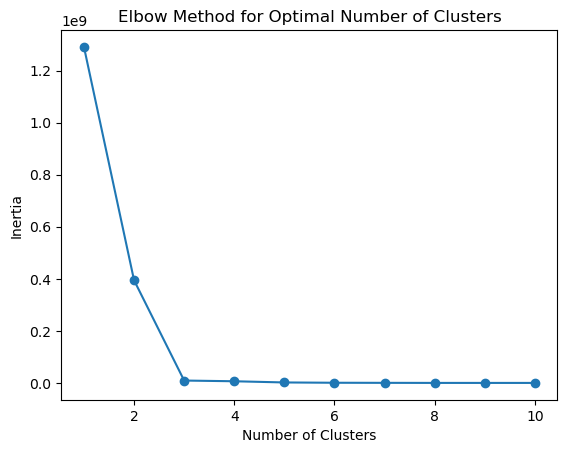

In [50]:
negara_data.plot_elbow_method(LAIA_net_df)

In [51]:
LAIA_cluster = negara_data.perform_clustering(LAIA_net_df,3)
LAIA_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,72.0,-27.714286,55.571429,-2.714286,-15.857143,14.857143,-153.0,-439.285714
1,6297.0,8209.000000,6895.000000,7325.000000,6711.000000,9292.000000,13774.0,15652.000000
2,-4465.5,-4729.000000,-4253.500000,-4067.000000,-5135.000000,-6672.000000,-7522.0,-7127.500000


In [52]:
NAFTA_import = negara_data.createImportGrouped(negara_data.NAFTA)
NAFTA_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
CANADA,2771,3047,3273,3346,3045,3567,5466,4301
MEXICO,1549,1402,1485,1730,1695,2304,2933,3064


In [53]:
NAFTA_export = negara_data.createExportGrouped(negara_data.NAFTA)
NAFTA_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
CANADA,2923,3525,3550,3533,3978,6359,4882,4174
MEXICO,7846,9611,8380,9055,8406,11596,16707,18716


In [54]:
NAFTA_net_df = negara_data.calNet(NAFTA_export, NAFTA_import)
NAFTA_net_df

#There are only two data, so dont need to do clustering

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
CANADA,152.0,478.0,277.0,187.0,933.0,2792.0,-584.0,-127.0
MEXICO,6297.0,8209.0,6895.0,7325.0,6711.0,9292.0,13774.0,15652.0


In [55]:
results = negara_data.find_max_min(NAFTA_net_df)
# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value Max Country
2016_Net     6297.0    [MEXICO]
2017_Net     8209.0    [MEXICO]
2018_Net     6895.0    [MEXICO]
2019_Net     7325.0    [MEXICO]
2020_Net     6711.0    [MEXICO]
2021_Net     9292.0    [MEXICO]
2022_Net    13774.0    [MEXICO]
2023_Net    15652.0    [MEXICO]

Min Values:
          Min Value Min Country
2016_Net      152.0    [CANADA]
2017_Net      478.0    [CANADA]
2018_Net      277.0    [CANADA]
2019_Net      187.0    [CANADA]
2020_Net      933.0    [CANADA]
2021_Net     2792.0    [CANADA]
2022_Net     -584.0    [CANADA]
2023_Net     -127.0    [CANADA]


In [56]:
# Define the title and savefig_name
title = 'NAFTA Net Exports Line Plot'
savefig_name = 'nafta_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(NAFTA_net_df, title, savefig_name)


In [57]:
SAARC_import = negara_data.createImportGrouped(negara_data.SAARC)
SAARC_import

,2016,2017,2018,2019,2020,2021,2022,2023
Imports_Country,,,,,,,,
AFGHANISTAN,1,2,4,0,0,0,2,17
BANGLADESH,788,950,1064,958,872,1300,1428,1499
BHUTAN,0,1,1,0,0,0,0,0
INDIA,16702,26853,26497,24285,24930,24531,31458,29852
MALDIVES,5,3,2,4,5,3,1,22
NEPAL,2,2,1,2,3,2,3,7
PAKISTAN,712,720,757,1066,1097,1899,1827,2045


In [58]:
SAARC_export = negara_data.createExportGrouped(negara_data.SAARC)
SAARC_export

,2016,2017,2018,2019,2020,2021,2022,2023
Exports_Country,,,,,,,,
AFGHANISTAN,354,518,431,455,497,894,1574,1535
BANGLADESH,5167,6545,9012,9732,5163,9358,18263,11204
BHUTAN,6,3,4,5,6,7,9,9
INDIA,31999,34531,36343,38587,30404,45203,54762,45533
MALDIVES,484,588,604,535,365,501,1007,805
NEPAL,120,122,134,160,156,232,253,245
PAKISTAN,4855,5044,5176,4880,4761,5997,6016,4386


In [59]:
SAARC_net_df = negara_data.calNet(SAARC_export, SAARC_import)
SAARC_net_df

,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
Exports_Country,,,,,,,,
AFGHANISTAN,353.0,516.0,427.0,455.0,497.0,894.0,1572.0,1518.0
BANGLADESH,4379.0,5595.0,7948.0,8774.0,4291.0,8058.0,16835.0,9705.0
BHUTAN,6.0,2.0,3.0,5.0,6.0,7.0,9.0,9.0
INDIA,15297.0,7678.0,9846.0,14302.0,5474.0,20672.0,23304.0,15681.0
MALDIVES,479.0,585.0,602.0,531.0,360.0,498.0,1006.0,783.0
NEPAL,118.0,120.0,133.0,158.0,153.0,230.0,250.0,238.0
PAKISTAN,4143.0,4324.0,4419.0,3814.0,3664.0,4098.0,4189.0,2341.0


In [60]:
results = negara_data.find_max_min(SAARC_net_df)
# Print results
print("Max Values:")
print(results['Max Values'])
print("\nMin Values:")
print(results['Min Values'])

Max Values:
          Max Value Max Country
2016_Net    15297.0     [INDIA]
2017_Net     7678.0     [INDIA]
2018_Net     9846.0     [INDIA]
2019_Net    14302.0     [INDIA]
2020_Net     5474.0     [INDIA]
2021_Net    20672.0     [INDIA]
2022_Net    23304.0     [INDIA]
2023_Net    15681.0     [INDIA]

Min Values:
          Min Value Min Country
2016_Net        6.0    [BHUTAN]
2017_Net        2.0    [BHUTAN]
2018_Net        3.0    [BHUTAN]
2019_Net        5.0    [BHUTAN]
2020_Net        6.0    [BHUTAN]
2021_Net        7.0    [BHUTAN]
2022_Net        9.0    [BHUTAN]
2023_Net        9.0    [BHUTAN]


In [61]:
# Define the title and savefig_name
title = 'SAARC Net Exports Line Plot'
savefig_name = 'saarc_net_exports_line.png'

# Plot the DataFrame and save the image
negara_data.plot_net_exports_line(SAARC_net_df, title, savefig_name)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

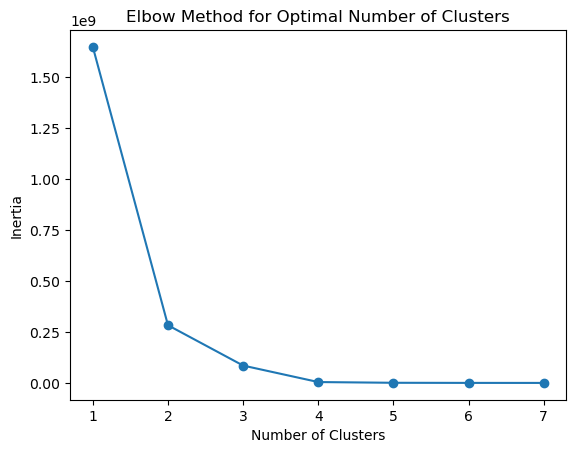

In [62]:
negara_data.plot_elbow_method(SAARC_net_df)

In [63]:
SAARC_cluster = negara_data.perform_clustering(SAARC_net_df,3)
SAARC_cluster

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,2016_Net,2017_Net,2018_Net,2019_Net,2020_Net,2021_Net,2022_Net,2023_Net
clusters,,,,,,,,
0,1019.8,1109.4,1116.8,992.6,936.0,1145.4,1405.2,977.8
1,4379.0,5595.0,7948.0,8774.0,4291.0,8058.0,16835.0,9705.0
2,15297.0,7678.0,9846.0,14302.0,5474.0,20672.0,23304.0,15681.0


In [64]:
# Calculate sum of exports and imports, and get the grouped DataFrame
grp = negara_data.sum_exports_imports()
grp

C:\Users\Asus\anaconda3\Scripts\Project\Negara.py:409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']] = exports[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].astype(float)
C:\Users\Asus\anaconda3\Scripts\Project\Negara.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']] = imports[['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023

,Total_Exports,Total_Imports
Negara,,
AFGHANISTAN,6258.0,26.0
AFRICA,200633.0,113781.0
ALANDISLANDS,0.0,0.0
ALBANIA,254.0,86.0
ALGERIA,3908.0,3595.0
...,...,...
YEMEN,6236.0,1641.0
YUGOSLAVIAFEDREPOF,0.0,0.0
ZAIREREPUBLICOF,0.0,0.0


In [65]:
africa = negara_data.createGrouped(negara_data.Africa)
africa

,Total_Exports,Total_Imports
Negara,,
ALGERIA,3908.0,3595.0
ANGOLA,6122.0,1580.0
BENIN,5706.0,68.0
BOTSWANA,82.0,2.0
BURUNDI,11.0,9.0
CAMEROON,2320.0,3902.0
CHAD,32.0,398.0
COMOROS,177.0,1.0
CONGO,1577.0,4943.0


In [77]:
title = "Total Exports vs Total Imports in Africa"
savefig_name = "exports_imports_bar_chart_Africa.png"

negara_data.plot_exports_imports_bar(africa, title, savefig_name)

In [67]:
SouthAmerica = negara_data.createGrouped(negara_data.SouthAmerica)
SouthAmerica

,Total_Exports,Total_Imports
Negara,,
ANGUILLA,0.0,0.0
ARGENTINA,5441.0,46415.0
ARUBA,10.0,208.0
BAHAMAS,75.0,177.0
BARBADOS,100.0,97.0
BELIZE,78.0,35.0
BERMUDA,15.0,2.0
BRAZIL,30945.0,77914.0
CHILE,6071.0,6888.0


In [ ]:
title = "Total Exports vs Total Imports in SouthAmerica"
savefig_name = "exports_imports_bar_chart_SouthAmerica.png"

negara_data.plot_exports_imports_bar(SouthAmerica, title, savefig_name)

In [68]:
NorthAmerica = negara_data.createGrouped(negara_data.NorthAmerica)
NorthAmerica

,Total_Exports,Total_Imports
Negara,,
CANADA,32924.0,28816.0


In [76]:
title = "Total Exports vs Total Imports in NorthAmerica"
savefig_name = "exports_imports_bar_chart_NorthAmerica.png"

negara_data.plot_exports_imports_bar(NorthAmerica, title, savefig_name)

In [69]:
Asia = negara_data.createGrouped(negara_data.Asia)
Asia

,Total_Exports,Total_Imports
Negara,,
AFGHANISTAN,6258.0,26.0
ARMENIA,70.0,5.0
AZERBAIJAN,818.0,295.0
BAHRAIN,2346.0,8873.0
BANGLADESH,74444.0,8859.0
BHUTAN,49.0,2.0
CAMBODIA,14621.0,4984.0
CHINA,1258750.0,1593102.0
GEORGIA,1062.0,260.0


In [79]:
title = "Total Exports vs Total Imports in Asia"
savefig_name = "exports_imports_bar_chart_Asia.png"

negara_data.plot_exports_imports_bar(Asia, title, savefig_name)

In [70]:
Europe = negara_data.createGrouped(negara_data.Europe)
Europe

,Total_Exports,Total_Imports
Negara,,
ALBANIA,254.0,86.0
ANDORRA,13.0,3.0
AUSTRIA,4857.0,20109.0
BELARUS,645.0,1309.0
BELGIUM,47483.0,26256.0
BULGARIA,3301.0,1121.0
CROATIA,997.0,639.0
CYPRUS,429.0,307.0
DENMARK,6858.0,8700.0


In [80]:
title = "Total Exports vs Total Imports in Europe"
savefig_name = "exports_imports_bar_chart_Europe.png"

negara_data.plot_exports_imports_bar(Europe, title, savefig_name)

In [71]:
Oceania = negara_data.createGrouped(negara_data.Oceania)
Oceania

,Total_Exports,Total_Imports
Negara,,
AUSTRALIA,278012.0,198234.0
FIJI,3648.0,91.0
GUAM,734.0,6.0
KIRIBATI,64.0,65.0
NAURU,19.0,1.0
NIUE,1.0,0.0
PALAU,35.0,0.0
PITCAIRN,1.0,0.0
TOKELAU,9.0,61.0


In [82]:
title = "Total Exports vs Total Imports in Oceania"
savefig_name = "exports_imports_bar_chart_Oceania.png"

negara_data.plot_exports_imports_bar(Oceania, title, savefig_name)

In [72]:
#Make the data in the 
# Initialize the data dictionary
data = {
    'Negara': [],
    'Total_Exports': [],
    'Total_Imports': []
}

# Populate the data dictionary
for negara, row in grp.iterrows():
    data['Negara'].append(negara)
    data['Total_Exports'].append(row['Total_Exports'])
    data['Total_Imports'].append(row['Total_Imports'])

data = pd.DataFrame(data)
data

,Negara,Total_Exports,Total_Imports
0,AFGHANISTAN,6258.0,26.0
1,AFRICA,200633.0,113781.0
2,ALANDISLANDS,0.0,0.0
3,ALBANIA,254.0,86.0
4,ALGERIA,3908.0,3595.0
...,...,...,...
246,YEMEN,6236.0,1641.0
247,YUGOSLAVIAFEDREPOF,0.0,0.0
248,ZAIREREPUBLICOF,0.0,0.0
249,ZAMBIA,214.0,661.0


In [73]:
negara_list = data['Negara'].tolist()
negara_list

['AFGHANISTAN',
 'AFRICA',
 'ALANDISLANDS',
 'ALBANIA',
 'ALGERIA',
 'AMERICANSAMOA',
 'ANDORRA',
 'ANGOLA',
 'ANGUILLA',
 'ANTIGUA&BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'ARUBA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BERMUDA',
 'BHUTAN',
 'BOLIVIAPLURINATIONALSTATEOF',
 'BONAIRESINTEUSTATIUSANDSABA',
 'BOSNIAANDHERZEGOVINA',
 'BOTSWANA',
 'BOUVETISLAND',
 'BRAZIL',
 'BRITISHINDIANOCEANTERRITORY',
 'BRUNEIDARUSSALAM',
 'BULGARIA',
 'BURKINAFASO',
 'BURUNDI',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CAPEVERDE',
 'CAYMANISLANDS',
 'CENTRALAFRICANREPUBLIC',
 'CHAD',
 'CHILE',
 'CHINA',
 'CHRISTMASISLAND',
 'COCOS(KEELING)ISLANDS',
 'COLOMBIA',
 'COMOROS',
 'CONGO',
 'CONGOTHEDEMOCRATICREPUBLICOFTHE',
 'COOKISLANDS',
 'COSTARICA',
 "COTED'IVOIRE",
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'CZECHREPUBLIC',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICANREPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL

In [74]:
geolocator = Nominatim(user_agent="project")

In [75]:
# Initialize the lat_lon_data dictionary
lat_lon_data = {
    'Negara': negara_list,
    'Latitude': [],
    'Longitude': []
}

# Iterate through negara_list and fetch coordinates
for negara in negara_list:
    location = geolocator.geocode(negara)
    
    if location:
        # Append latitude and longitude to the respective lists
        lat_lon_data['Latitude'].append(location.latitude)
        lat_lon_data['Longitude'].append(location.longitude)
    else:
        # Append None if location is not found
        lat_lon_data['Latitude'].append(None)
        lat_lon_data['Longitude'].append(None)

lat_lon_df = pd.DataFrame(lat_lon_data)
lat_lon_df

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=SRILANKA&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000193E87AED80>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [ ]:
# Merging dataframes on the 'Negara' column
merged_df = pd.merge(data, lat_lon_df, on='Negara', how='left')
merged_df

In [ ]:
# Replace NaN values in 'Total_Exports' and 'Total_Imports' with 0
merged_df['Total_Exports'].fillna(0, inplace=True)
merged_df['Total_Imports'].fillna(0, inplace=True)

# Now plot the scatter geo plot
fig = px.scatter_geo(merged_df,
                     lat='Latitude', lon='Longitude',
                     size='Total_Exports', color='Total_Imports',
                     hover_name='Negara',
                     size_max=30,
                     title='Total Exports and Imports by Country')

# Display the map
fig.show()
